In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [4]:
df = pd.read_csv("/Users/duda/Downloads/23-Projeto2/dataset/aug_train.csv")
print(df.columns)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
#Categoricas
df.describe(include= object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [9]:
#Numericas
df.describe().drop(columns = ['enrollee_id', 'target'])
#id is not relevant and target is a boolean value

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


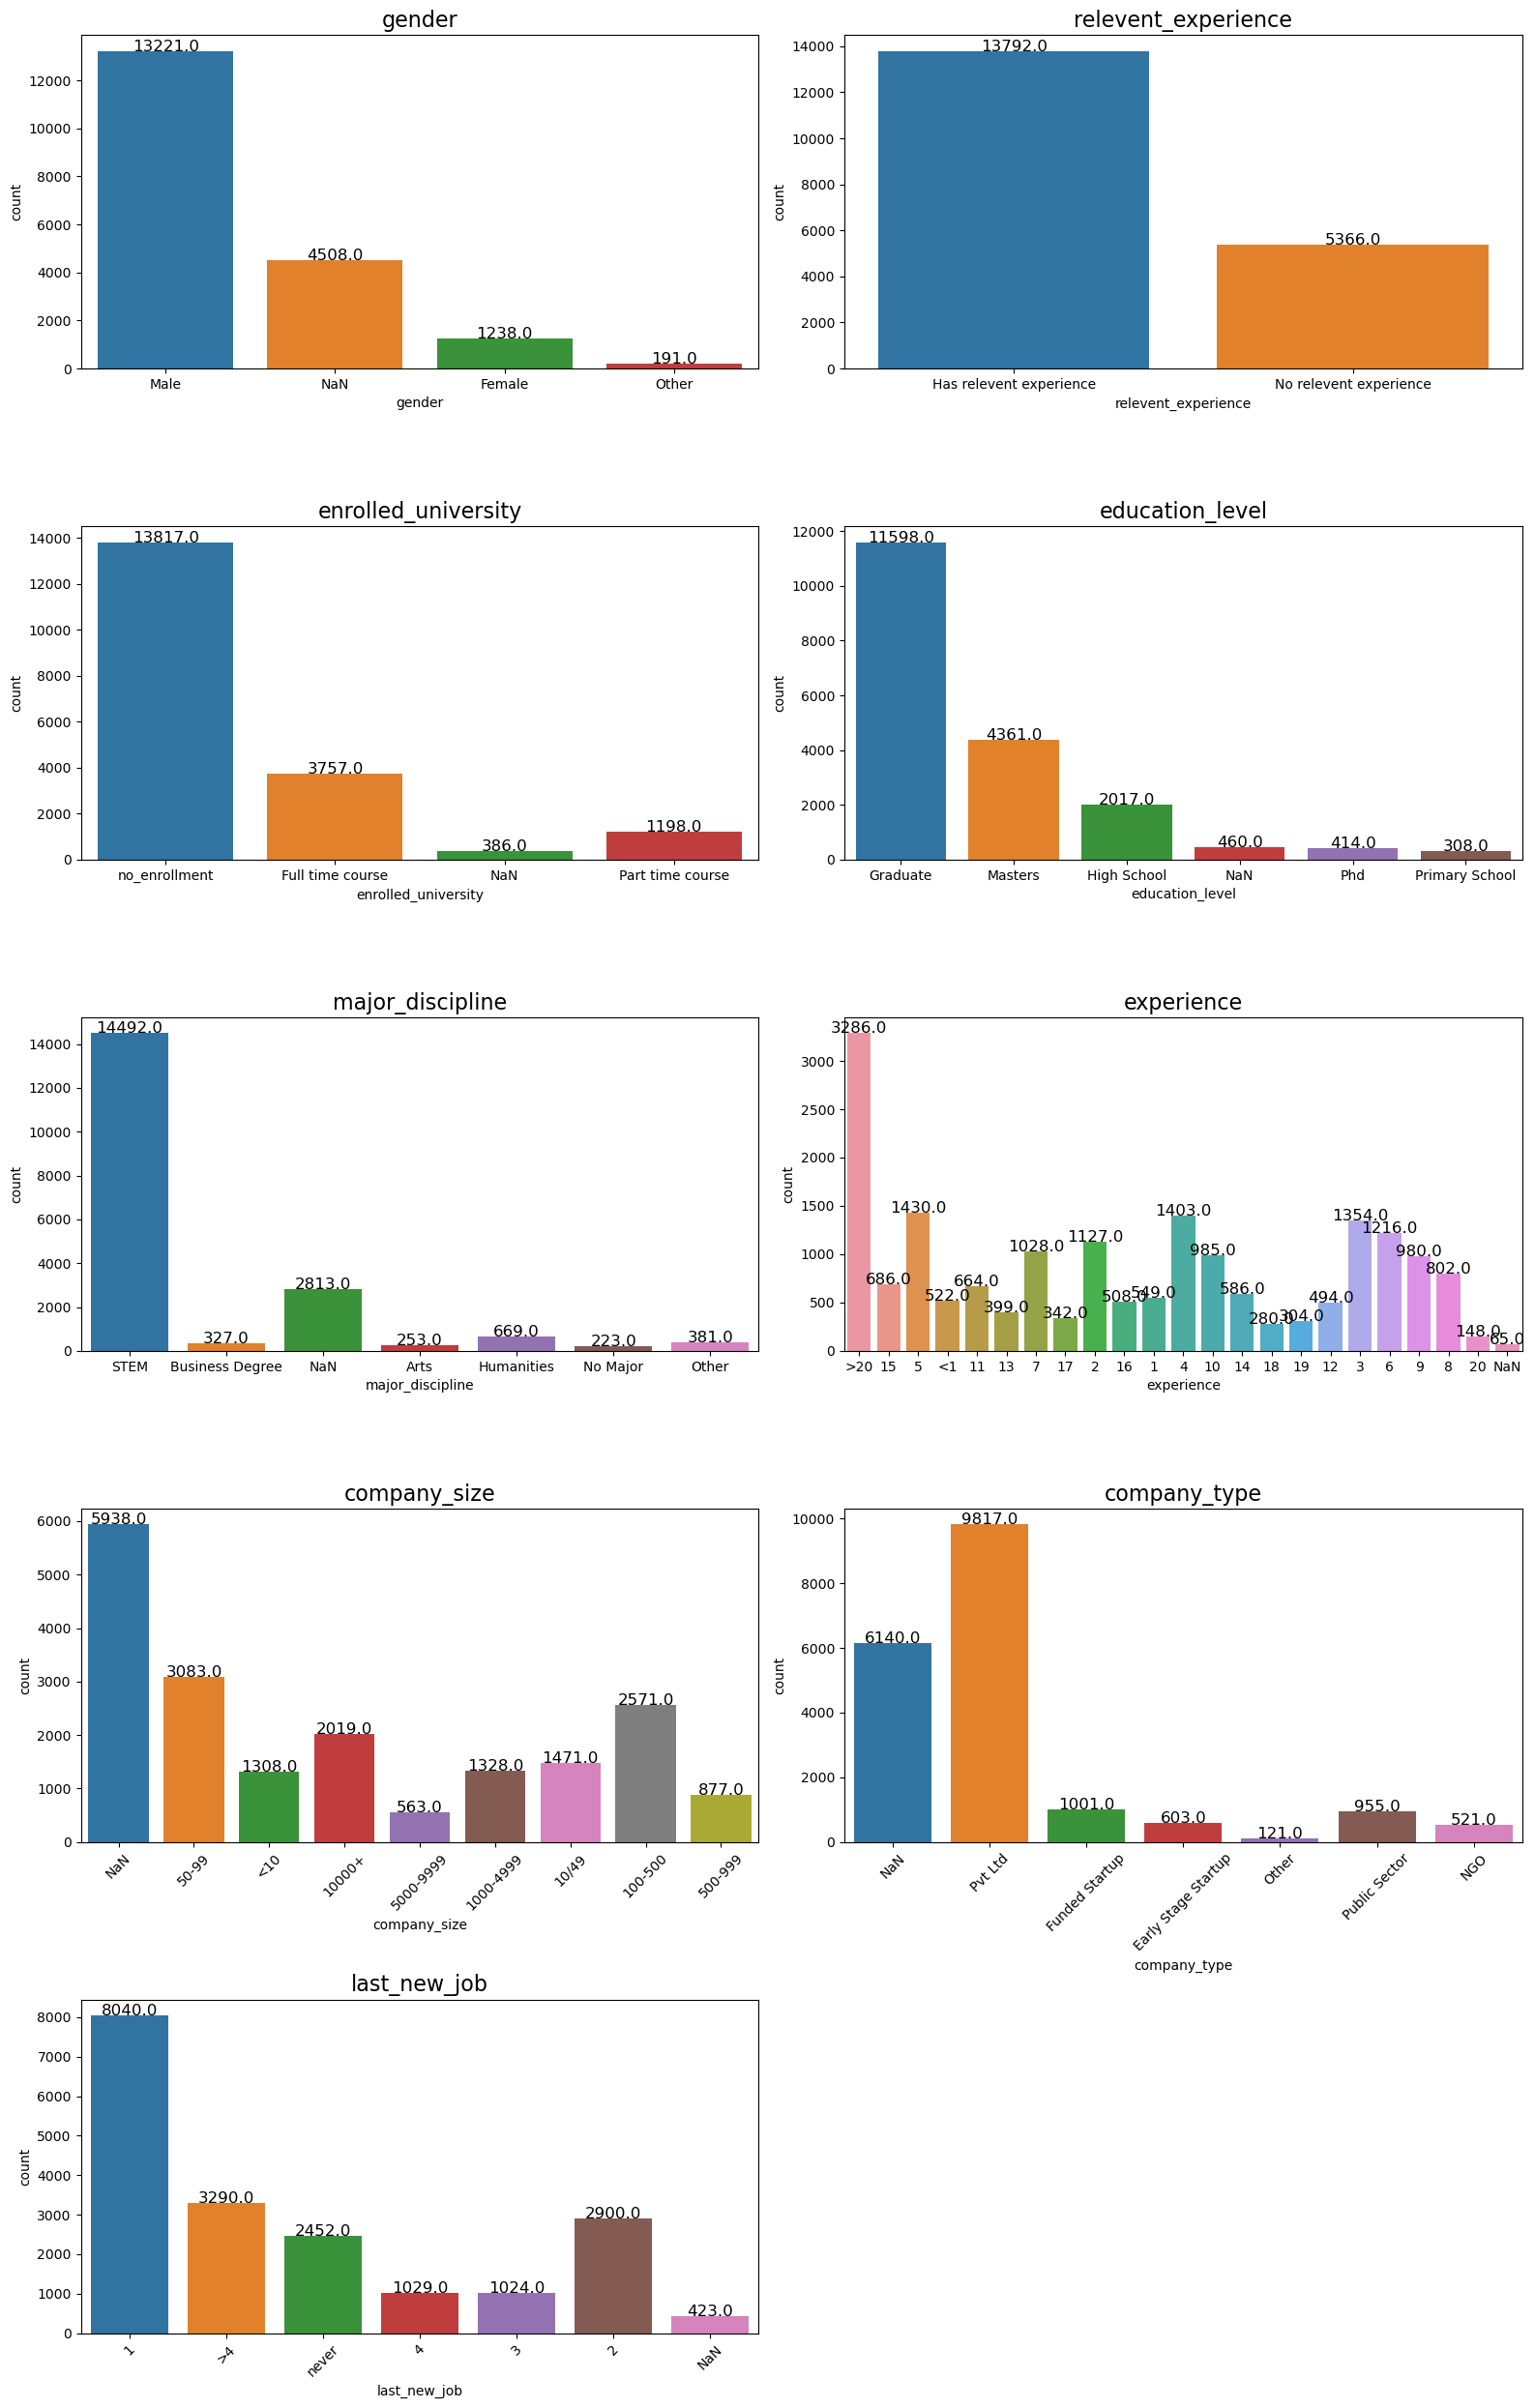

In [11]:
# Plot categorico

plt.figure(figsize = (16,25))

column_list = list(df.columns.values)[3:12]

A = 0

for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 16)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

plt.tight_layout(h_pad = 2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


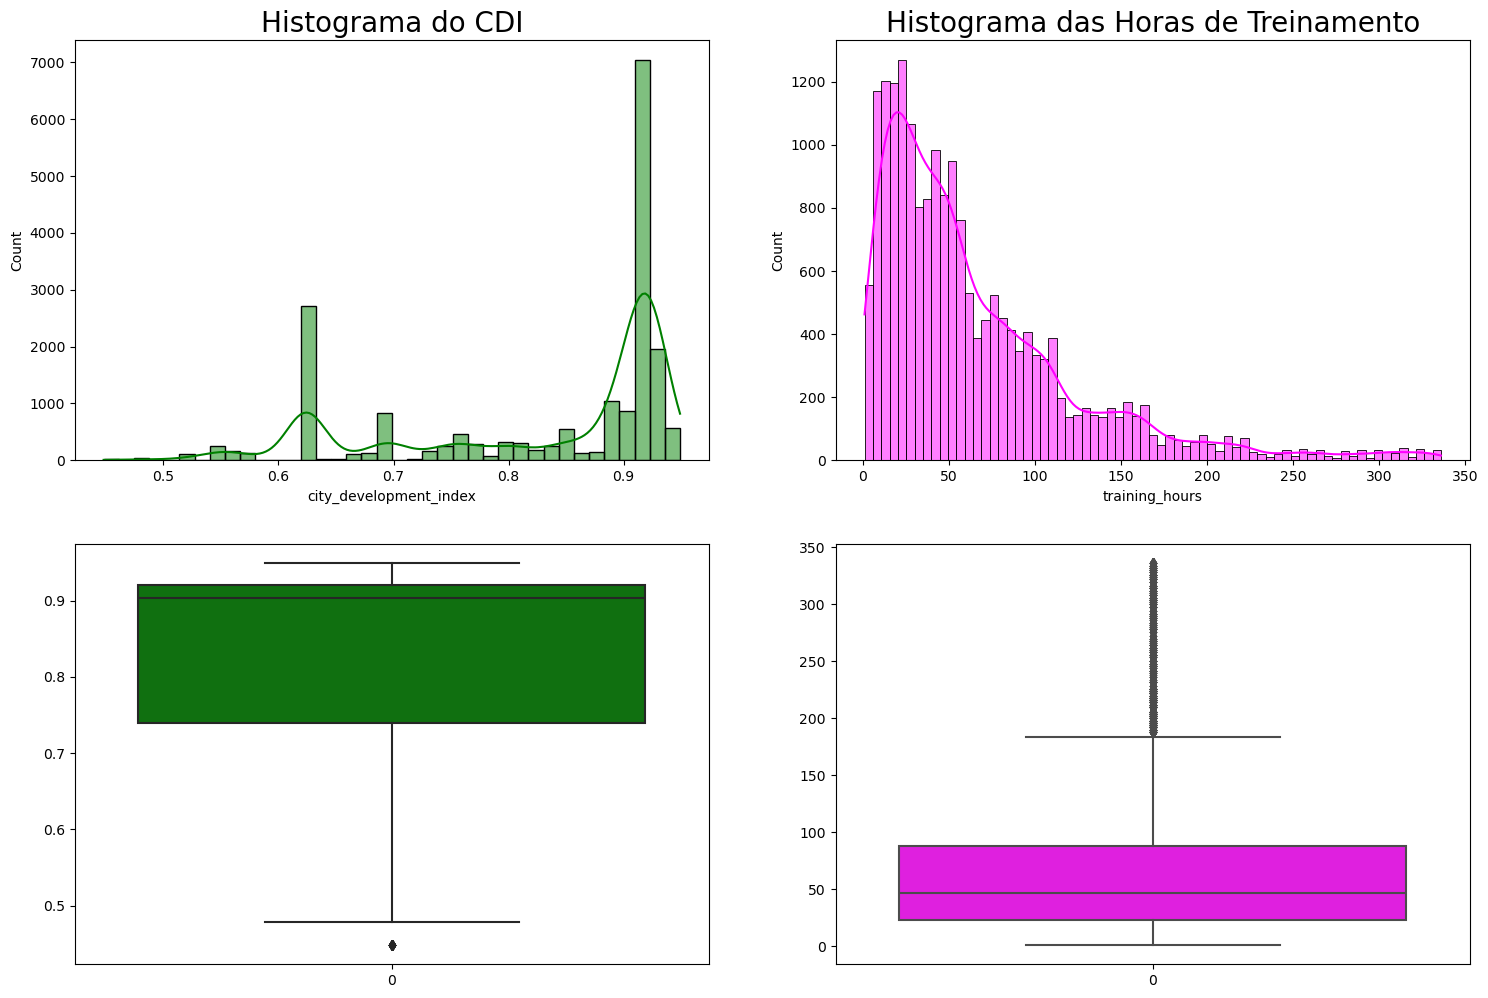

In [12]:
# Plot numerico

plt.figure(figsize = (18,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

In [13]:
# Teste de Normalidade da Distribuição

numerical_feature = ['city_development_index', 'training_hours']

for i in numerical_feature:
    
    # Calcula a normalidade 
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


In [14]:
# As variaveis experience e last_new_job serao convertidas para tipo float e usada na analise de correlacao

df_numerical = df.copy()

In [15]:
df_numerical["experience"].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [16]:
# Convertemos a variável experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [17]:
df_numerical["last_new_job"].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [18]:
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [19]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [27]:
numerical_columns = df_numerical[['city_development_index', 'experience', 'last_new_job', 'target']]

numerical_columns.corr("spearman")


,city_development_index,experience,last_new_job,target
city_development_index,1.000000,0.300997,0.182698,-0.279165
experience,0.300997,1.000000,0.473284,-0.183721
last_new_job,0.182698,0.473284,1.000000,-0.082045
target,-0.279165,-0.183721,-0.082045,1.000000


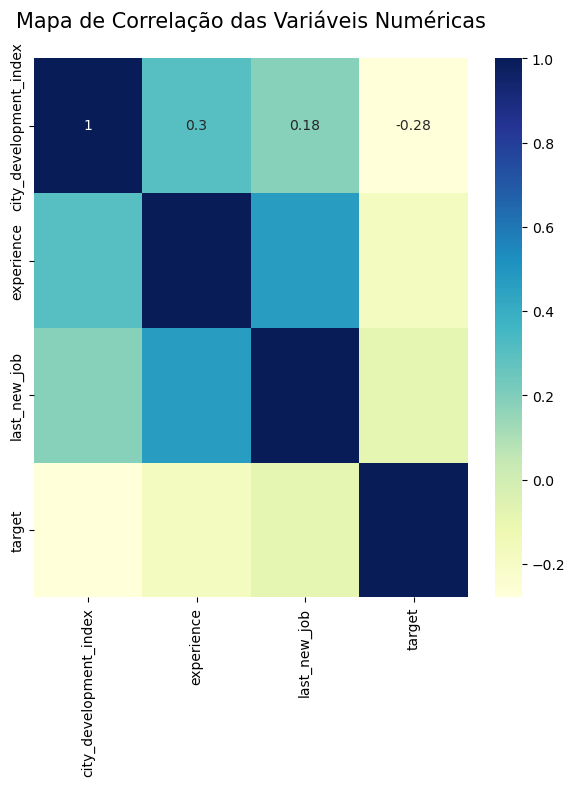

In [28]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(numerical_columns.corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [29]:
df_numerical.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [34]:
categorical_columns = df_numerical[['gender', 'relevent_experience', 'enrolled_university', 'education_level']]

In [35]:
# Loop
for i in categorical_columns.columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/3420929299.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iv.append(df_woe_iv['iv'][0])
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/3420929299.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iv.append(df_woe_iv['iv'][0])
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/3420929299.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

<Figure size 1000x1200 with 0 Axes>

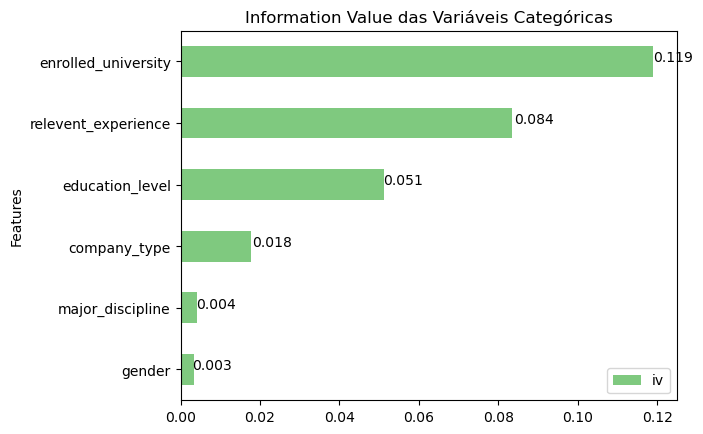

In [42]:
# Plot do Information Value

columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

iv = []

for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

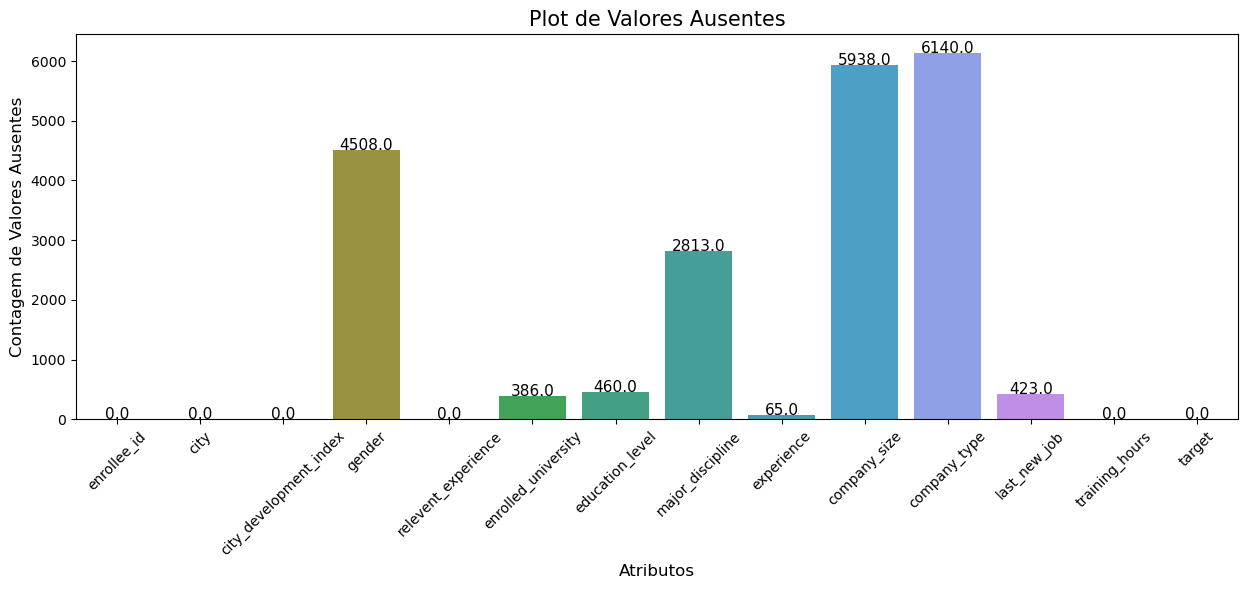

In [44]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

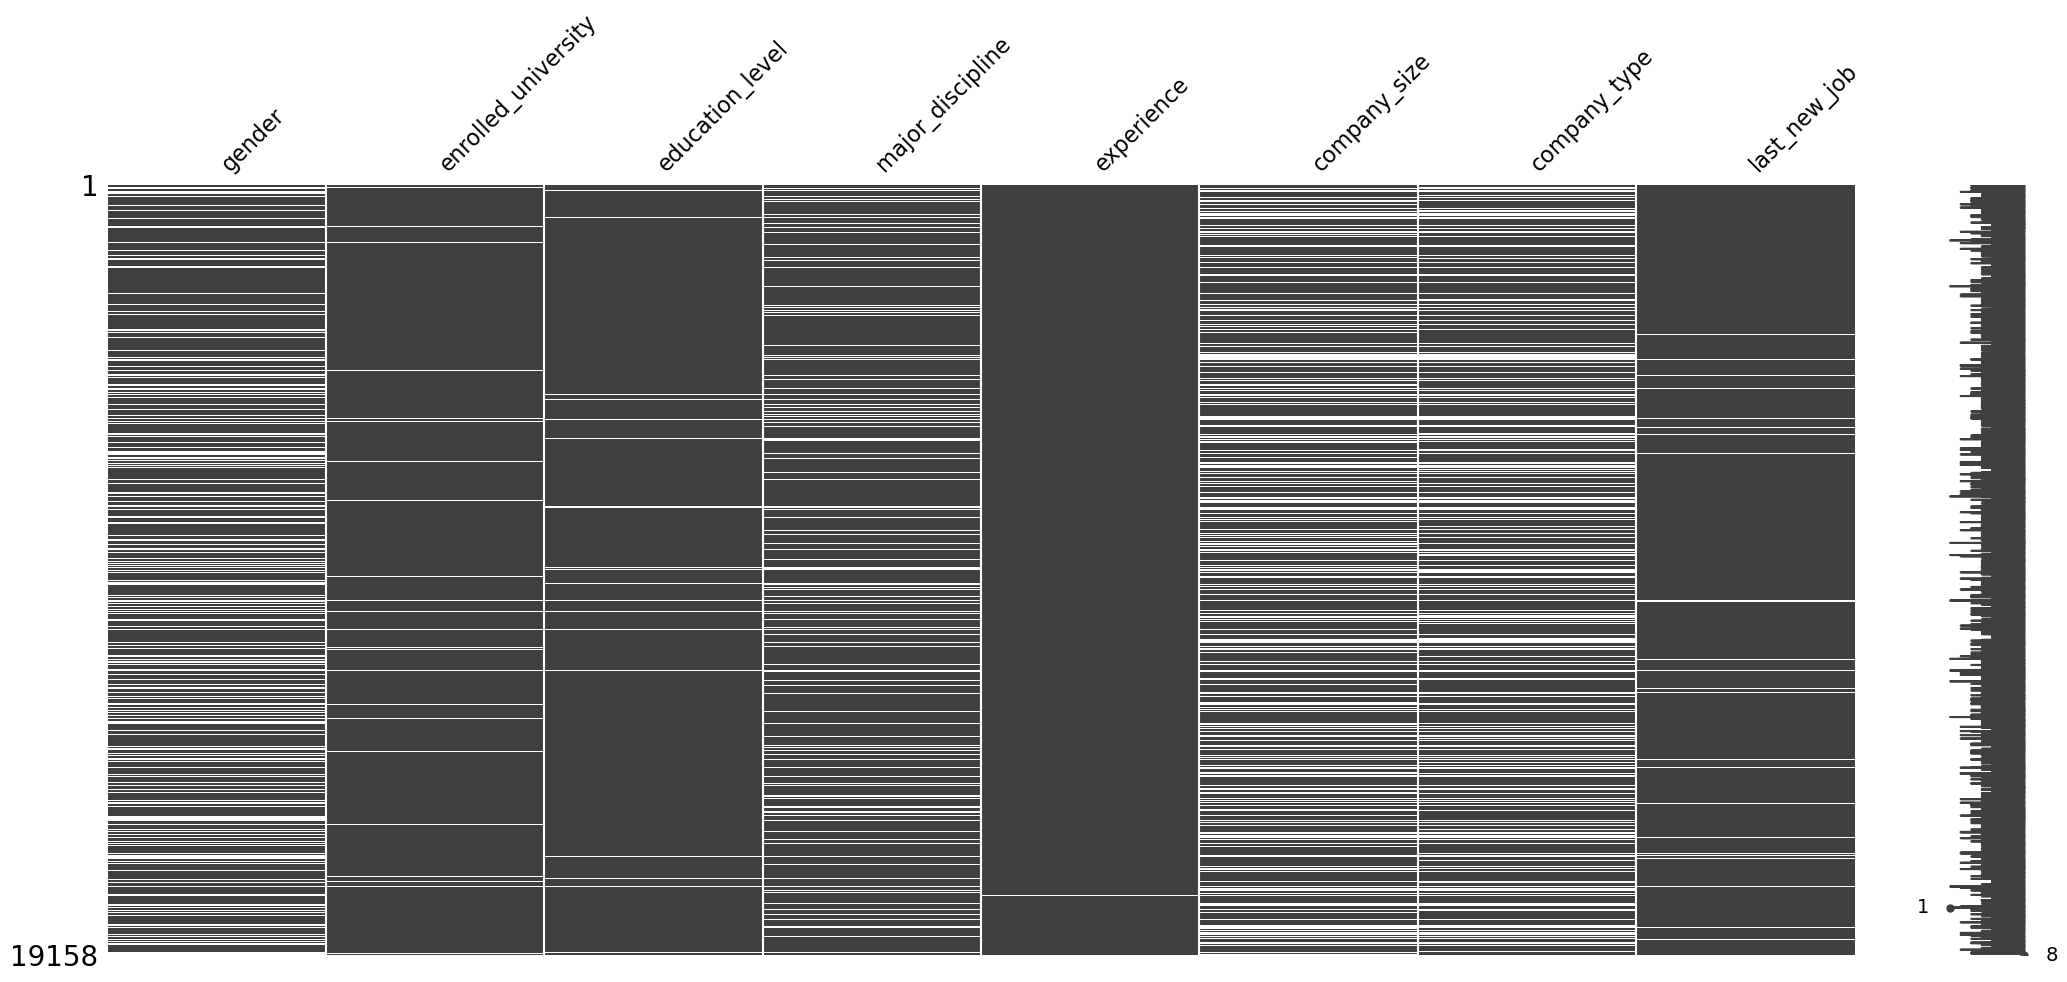

In [45]:
# Verificando a existencia de um padrao nos valores ausentes

df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes
if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

# Sem padrao

Text(0.5, 1.0, 'Target Imbalance Ratio')

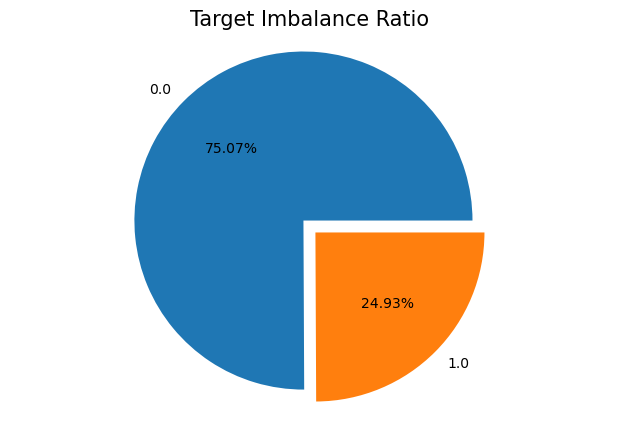

In [46]:
# Checando o balanceamento dos dados

plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

# Desbalanceados

In [47]:
# Limpesa/tratamento do dados

# Selecao de colunas relevantes para a analise
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'target']

In [49]:
new_df = df[colunas_manter]
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,0.0


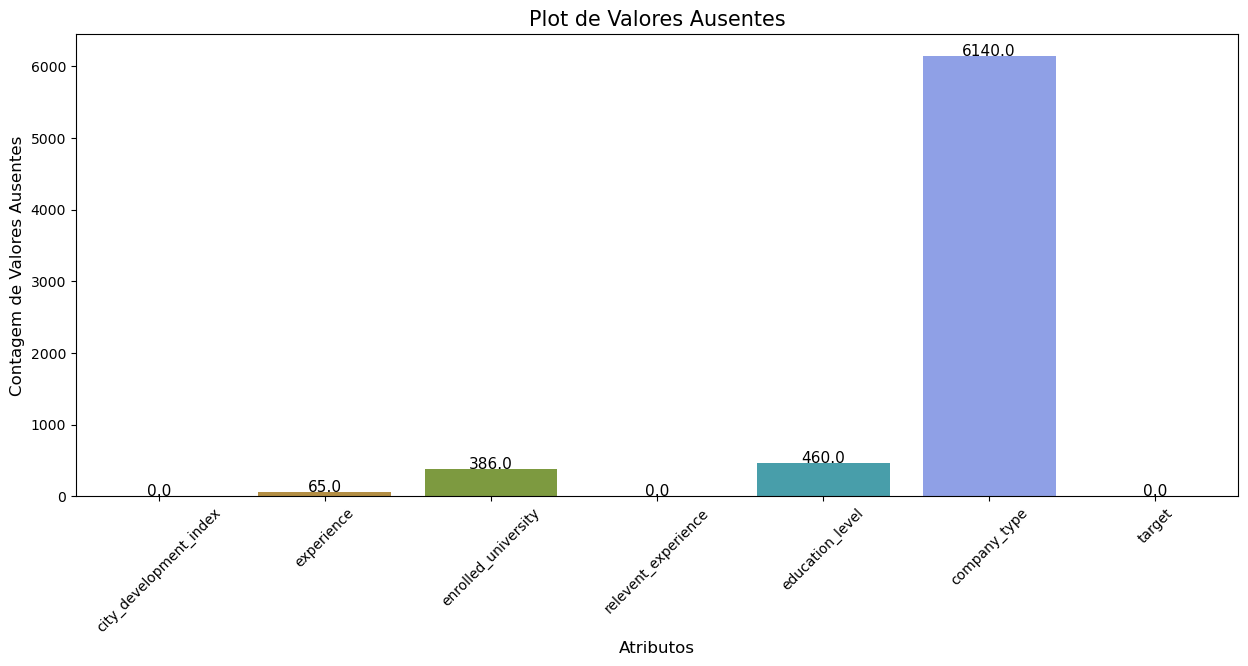

In [51]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

# Apenas 3 colunas sem valores ausentes

#### Variável enrolled_university

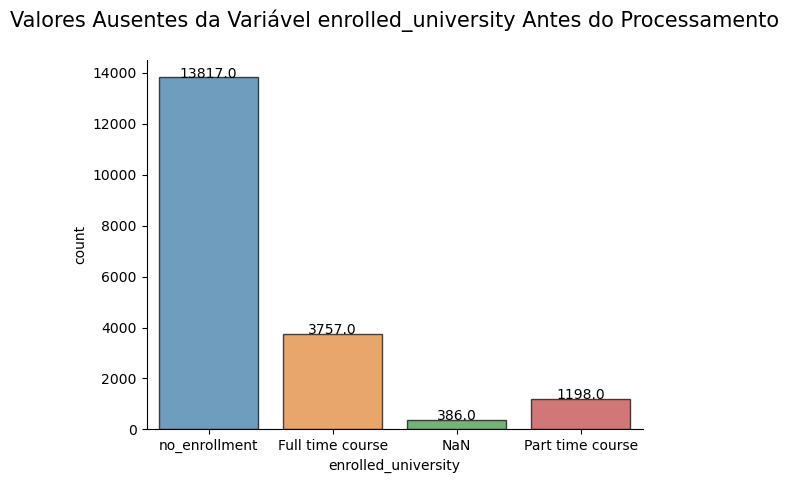

In [53]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [54]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 386

Proporção de Valores Ausentes na Variável education_level:


education_level
Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: count, dtype: int64

In [55]:
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [56]:
new_df['enrolled_university'][nan_index] = 'Primary Grad'

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/2833424211.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df['enrolled_university'][nan_index] = 'Primary Grad'
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipyker

In [57]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 377


education_level
Graduate       171
NaN            100
Masters         53
High School     47
Phd              6
Name: count, dtype: int64

In [58]:
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [59]:
new_df['enrolled_university'][nan_index] = 'Other'

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/547631149.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df['enrolled_university'][nan_index] = 'Other'
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_1094

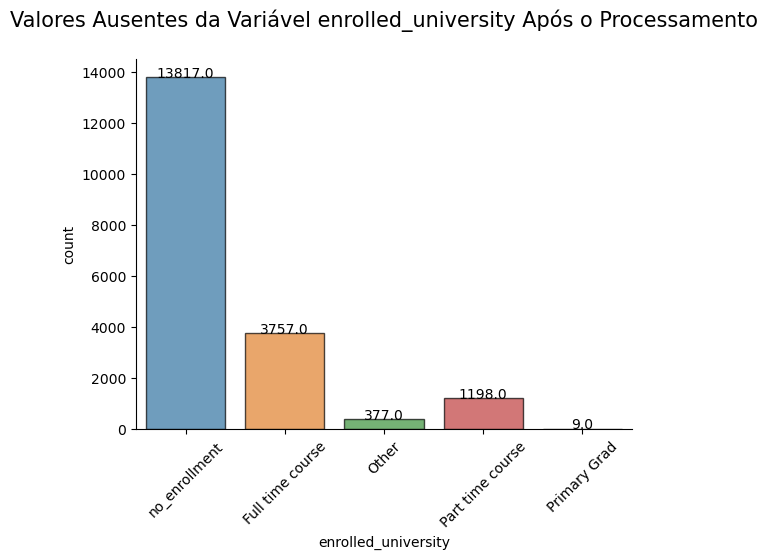

In [68]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    if A >=0:
        plt.xticks(rotation = 45)
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento\n", fontsize = 15)
plt.show()

In [63]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,0.0


#### Variável company_type

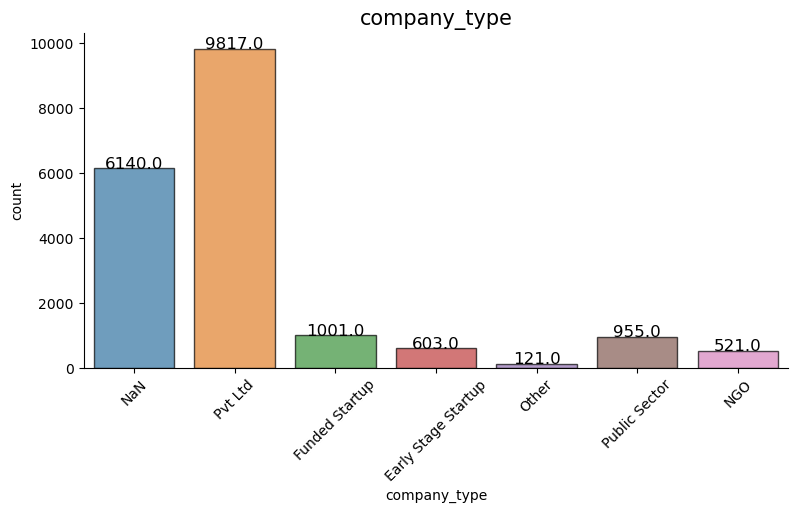

In [64]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [65]:
nan_index = new_df[(new_df['company_type'].isna())].index

In [66]:
new_df['company_type'][nan_index] = 'Other'

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/4025165527.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df['company_type'][nan_index] = 'Other'
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/4025

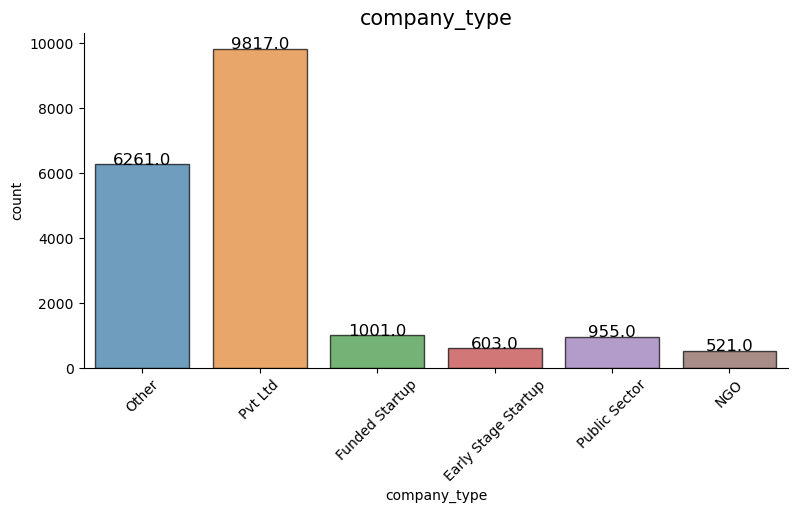

In [67]:
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [69]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,Other,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,0.0


#### Variável education_level

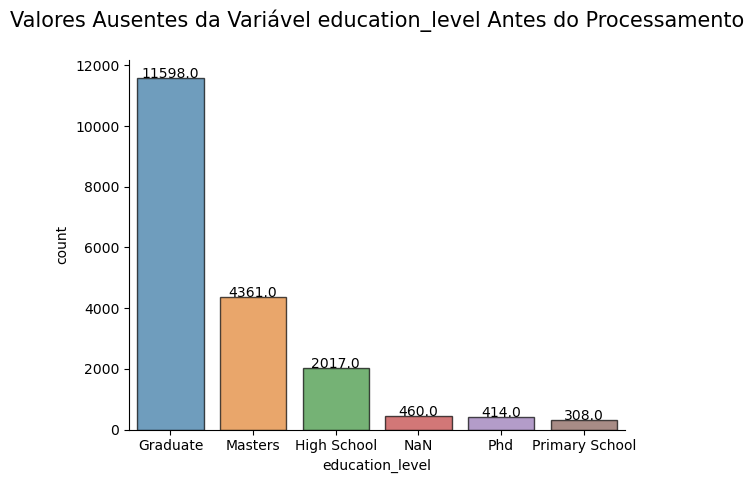

In [70]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [71]:
nan_index = new_df[(new_df['education_level'].isna())].index

In [72]:
new_df['education_level'][nan_index] = 'Other'

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/1294533344.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df['education_level'][nan_index] = 'Other'
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_10945/1

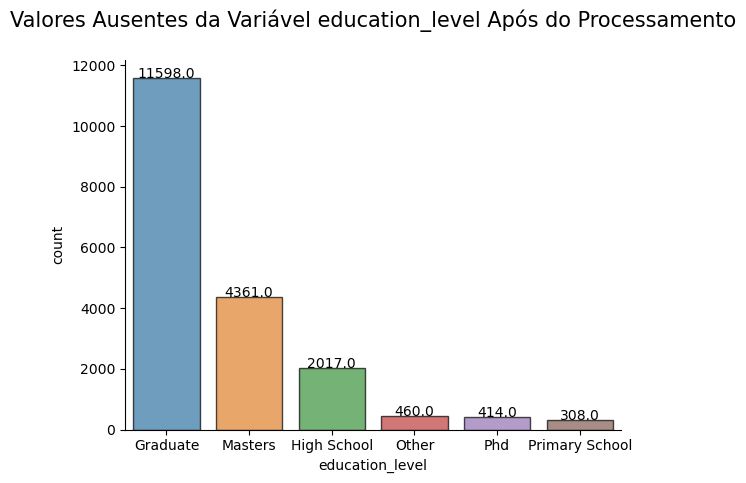

In [73]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)
plt.show()

In [74]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,Other,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,0.0


#### Variável experience

In [75]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

# Porcentual baixo justifica a exclusao da linha

city_development_index    0.000000
experience                0.339284
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
target                    0.000000
dtype: float64

In [76]:
new_df['experience'].isnull().sum()

65

In [77]:
new_df = new_df.dropna()

In [78]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
target                    0.0
dtype: float64

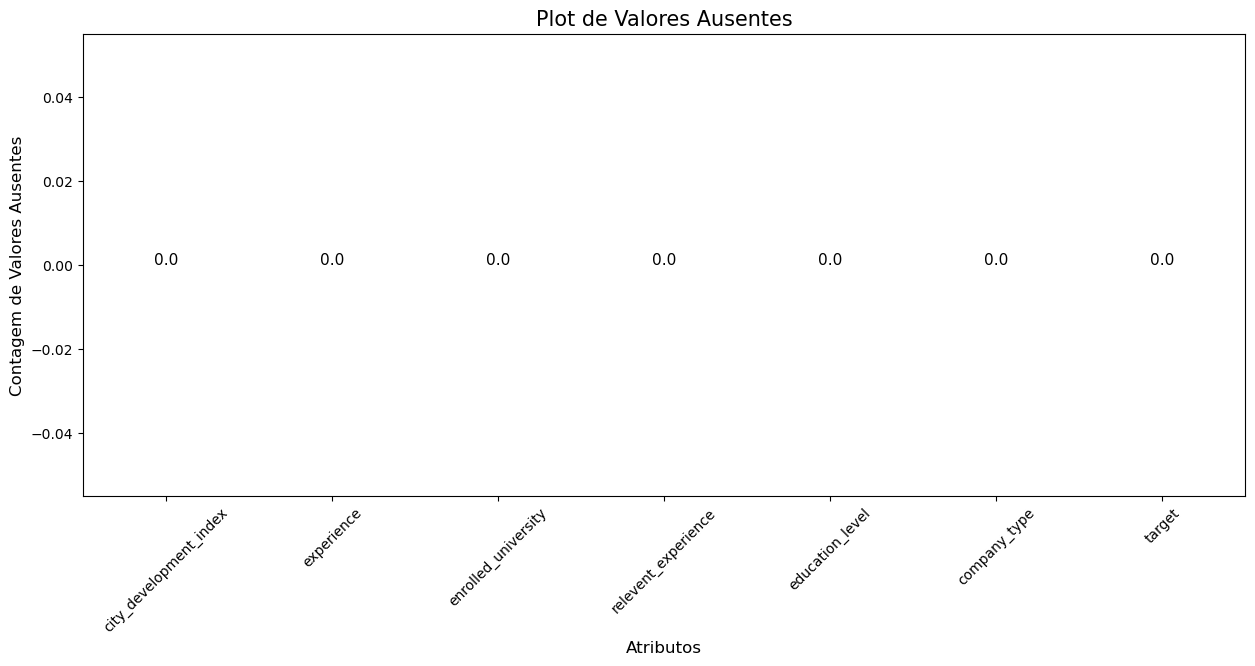

In [80]:
null_df = new_df.isna().sum().reset_index()

ax = plt.figure(figsize = (15,6))

ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### Ajustes Finais

In [81]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,Other,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,0.0


In [82]:
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [83]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,target
0,0.920,>20,No enrollment,Has relevent experience,Graduate,Other,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,0.0
